<a href="https://colab.research.google.com/github/aibak365/randow_to_try/blob/main/PSNR_slightlyChnage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
!pip install torchmetrics
from torchmetrics.image import StructuralSimilarityIndexMeasure as SSIM
import torchvision.transforms as transforms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [40]:
def tensor_to_image(tensor):
    """
    Converts a tensor representing an image to a PIL image object.

    Args:
        tensor: A tensor with shape (C, H, W) representing an image.
                C - number of channels (usually 3 for RGB)
                H - height of the image
                W - width of the image

    Returns:
        A PIL image object that can be displayed or saved.
    """
    if tensor.ndim == 4:
        tensor = tensor.squeeze(0)  # Remove the batch dimension if present

    # If the tensor has only 1 channel, remove the channel dimension
    if tensor.size(0) == 1:
        tensor = tensor.squeeze(0)

    # Clip values between 0 and 1 (assuming they are normalized)
    tensor = tensor.clamp(0, 1)

    # Convert the tensor to a NumPy array
    tensor = tensor.cpu().detach().numpy()

    # Convert the NumPy array to a uint8 array (uint8 for representing pixel values 0-255)
    image_array = (tensor * 255).astype(np.uint8)

    # Create a PIL image from the array
    return Image.fromarray(image_array)


In [45]:
import numpy as np

I = torch.full((1, 224, 224), 128)
# Create a checkerboard pattern
K = torch.zeros((1, 224, 224))
K[:, ::2, ::2] = 1  # Set every other pixel to 0.01
K[:, 1::2, 1::2] = 1  # Set every other pixel in the other rows to 0.01

# Scale the values to be between 0.49 and 0.51
K = K + 127




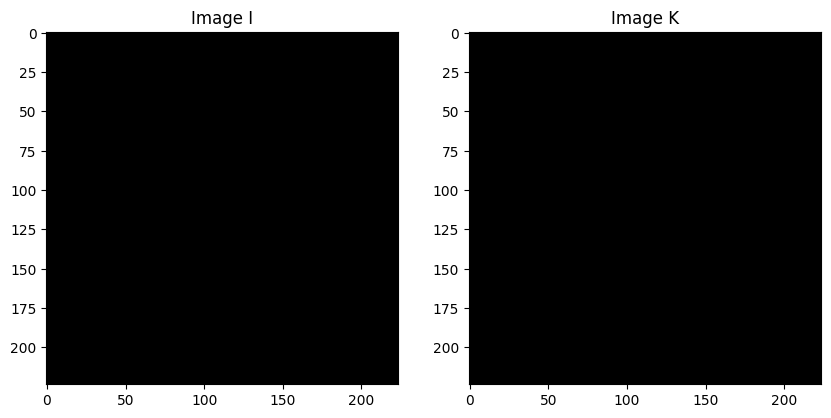

In [46]:
# Convert the tensors to PIL images
I_img = tensor_to_image(I)
K_img = tensor_to_image(K)

# Display the images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(I_img, cmap='gray')
plt.title('Image I')

plt.subplot(1, 2, 2)
plt.imshow(K_img, cmap='gray')
plt.title('Image K')

plt.show()

In [50]:
def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * torch.log10(PIXEL_MAX / torch.sqrt(mse))

# Example usage:
img1 = torch.rand(224, 224)  # Randomly generated image
img2 = torch.rand(224, 224)  # Another randomly generated image

print(psnr(I, K))
print(psnr(K,K))

tensor(51.1411)
100


In [51]:
from urllib.request import urlretrieve
url = "https://images.ctfassets.net/h6goo9gw1hh6/2QZf9aXx4UIiuCEDJ4fqQn/1c223d3e186fd7c9cf443b79c8a3bf92/meme_minutes_COVER.jpg?w=800&h=800&fl=progressive&q=70&fm=jpg"
filename = "cat.jpg"
urlretrieve(url, filename)

img = Image.open(filename)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((1024,1024))
])
x_original = transform(img)

# Create edited tensor with slight noise and color shift
x_edited = x_original.clone()

# Add slight Gaussian noise (humanly imperceptible)
noise = torch.randn(x_edited.shape) * 0.07
x_edited += noise

# Apply subtle color shift (barely noticeable)
x_edited[:, 0] += 0.02  # Increase red channel slightly
print(psnr(x_original.squeeze(0), x_edited.squeeze(0)))



tensor(71.2262)


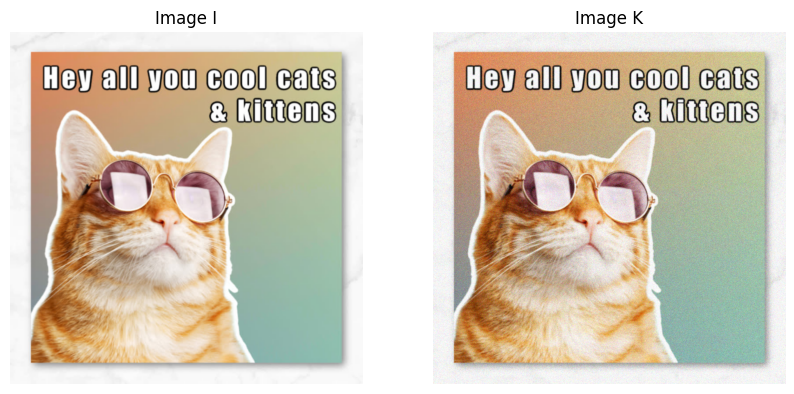

In [57]:
# Display the images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Transpose the tensor to move the channel dimension to the last position
plt.imshow(x_original.permute(1, 2, 0))
plt.title('Image I')
plt.axis('off')  # Hide axes
plt.subplot(1, 2, 2)
# Transpose the tensor to move the channel dimension to the last position
plt.imshow(x_edited.permute(1, 2, 0))
plt.title('Image K')
plt.axis('off')  # Hide axes
plt.show()